<a href="https://colab.research.google.com/github/EwenCheung/Learn-MachineLearning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

## 1. Split data into Training, Valid, and Test sets

In [4]:
# Create a train/test split
train_split= int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
  """
  Plots training data, test data and compare predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data , train_labels, c = "b",s=4,label = "Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c ="g", s = 4, label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data , predictions, c = "r",s=4,label = "Predictions")

  plt.legend(prop={"size":14})

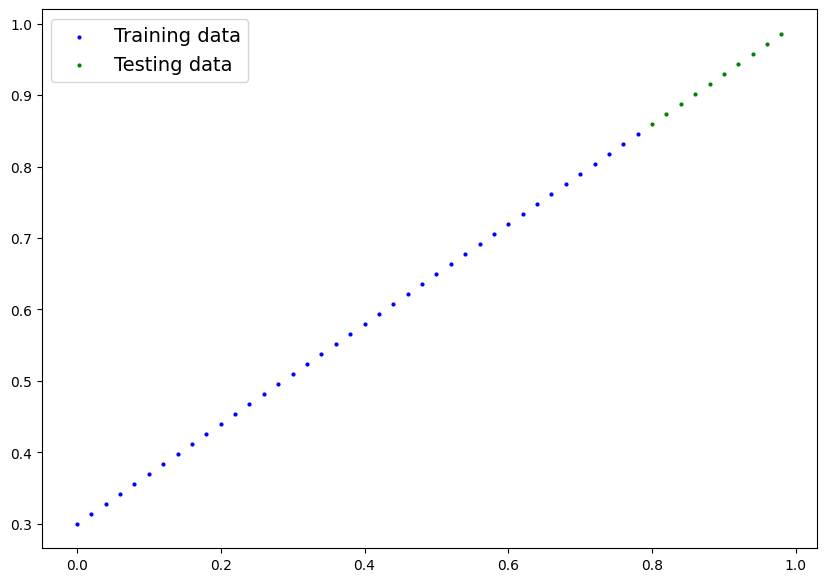

In [6]:
plot_predictions()

## 2. Build Model

In [7]:
# Create linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # almmost everything in PyTorch inherits from nn module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x : torch.Tensor) ->torch.Tensor :
    return self.weights  * x + self.bias

## Create a Model


In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model ( this is the subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
### Making prediction using torch.inference_mode()

with torch.inference_mode():
  y_preds = model_0(X_test)

In [11]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

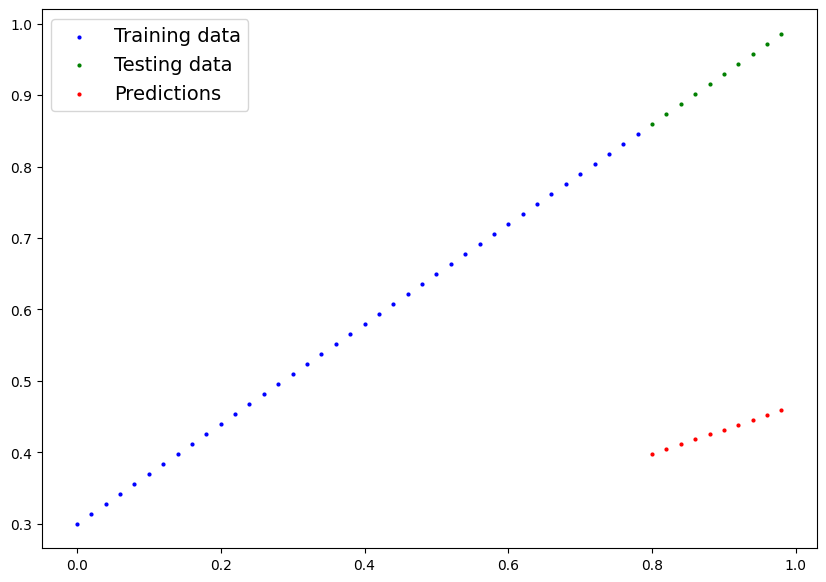

In [12]:
plot_predictions(predictions=y_preds)

## 3. Train Model

Things we need to train:
* **Loss function**
* **Optimizer**

Specifically for PyTorch, we need
* A training loop
* A testing loop


In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Loss Function and Optimizer

In [15]:
# Setup a loss function
loss_fn = nn.L1Loss() # Mean absolute error MAE

# Setup an optimizer ( We use SGD stochastic gradient descent here )
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

### Building a training loop ( and a testing loop ) in PyTorch

In Training Loop:
0. Loop through thr data
1. Forward pass ( `forward()` from input to output layer , also called forward propagation)
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward ( mobe backwards through the network , output to input )
5. Optimmizer step - use the optimizer to adjust our model's parameters to try and improve the loss

In [16]:
torch.manual_seed(42)

# An eopsh is one loop through the data
epochs = 200

# Track different models
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the data to training mode
  model_0.train() # Train mode in Pytorch sets all parameters that requires gradeisnts to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss:{loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Backpropagation on the loss
  loss.backward()

  # 5. Step the Optimizer ( perform gradient descent)
  optimizer.step()

  ## Testing
  model_0.eval() # turn off different settings in the model not needed for testing
  with torch.inference_mode():
    # 1. Do the for pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print what is happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch : {epoch} , Loss: {loss}, Test Loss :{test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())


Epoch : 0 , Loss: 0.31288138031959534, Test Loss :0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 , Loss: 0.1976713240146637, Test Loss :0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 , Loss: 0.08908725529909134, Test Loss :0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30 , Loss: 0.053148526698350906, Test Loss :0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40 , Loss: 0.04543796554207802, Test Loss :0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50 , Loss: 0.04167863354086876, Test Loss :0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60 , Loss: 0.03818932920694351, Test Loss :0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

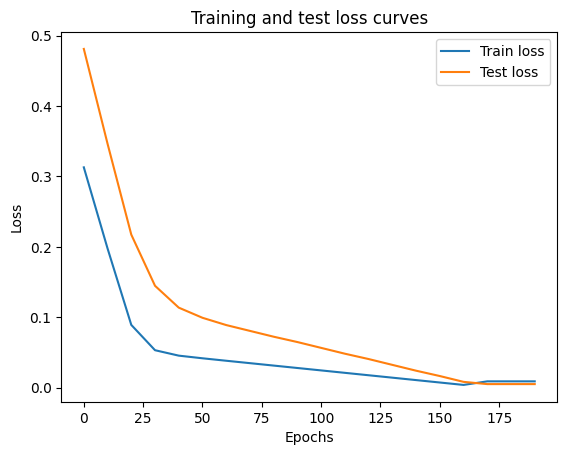

In [17]:
import numpy as np

# Plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count, test_loss_values , label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [18]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

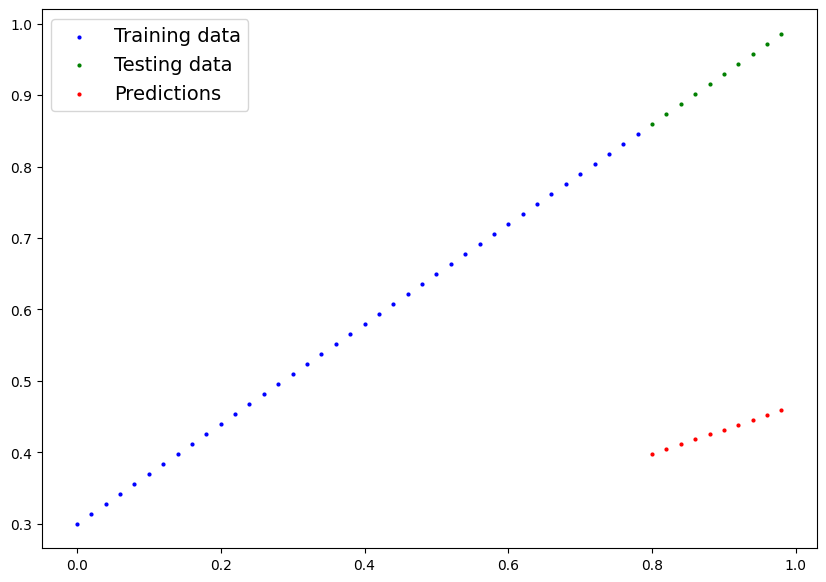

In [19]:
plot_predictions(predictions=y_preds)

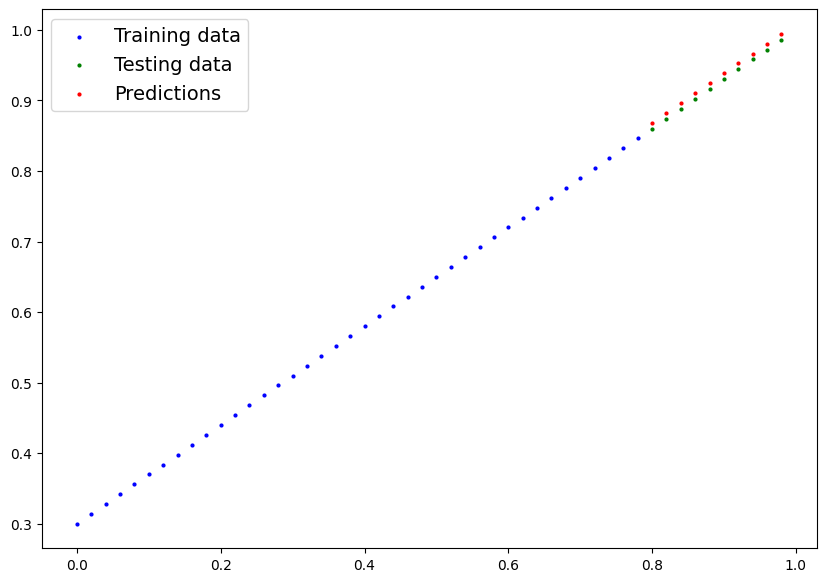

In [20]:
plot_predictions(predictions=y_preds_new)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
weight, bias

(0.7, 0.3)

## Saving a model in PyTorch

1. `torch.save()` -- save in python pickle format

2. `torch.load()` -- allows you to load saved PyTorch Object

3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [23]:
# Save our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state_dict
print(f"Savig Model to :(MODEL_SAVE_PATH")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Savig Model to :(MODEL_SAVE_PATH


In [24]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jan  7 14:52 01_pytorch_workflow_model_0.pth


In [25]:
# Loading a PyTorch model

In [26]:
model_0.state_dict

<bound method Module.state_dict of LinearRegressionModel()>

In [27]:
loaded_model_0 = LinearRegressionModel()

# torch.nn.Module.load_state_dict()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-27-a079b60a0153>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [30]:
# Compare loaded model and original model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting all them together

In [31]:
# Import Pytorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.5.1+cu121'

In [32]:
# Setup device agnostic code

device ="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## Data

In [33]:
# Create some data using the linear regression formula of y = weight*x + bias
weight = 0.9
bias = 0.4

# Create range values
start = 0
ends = 1
step = 0.02

# Create X and Y
X = torch.arange(start,ends,step).unsqueeze(dim= 1)
y = weight * X + bias

X[:10] ,y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4180],
         [0.4360],
         [0.4540],
         [0.4720],
         [0.4900],
         [0.5080],
         [0.5260],
         [0.5440],
         [0.5620]]))

In [34]:
# Split Data

train_split = int(0.8* len(X))

X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [35]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
  """
  Plots training data, test data and compare predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data , train_labels, c = "b",s=4,label = "Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c ="g", s = 4, label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data , predictions, c = "r",s=4,label = "Predictions")

  plt.legend(prop={"size":14})

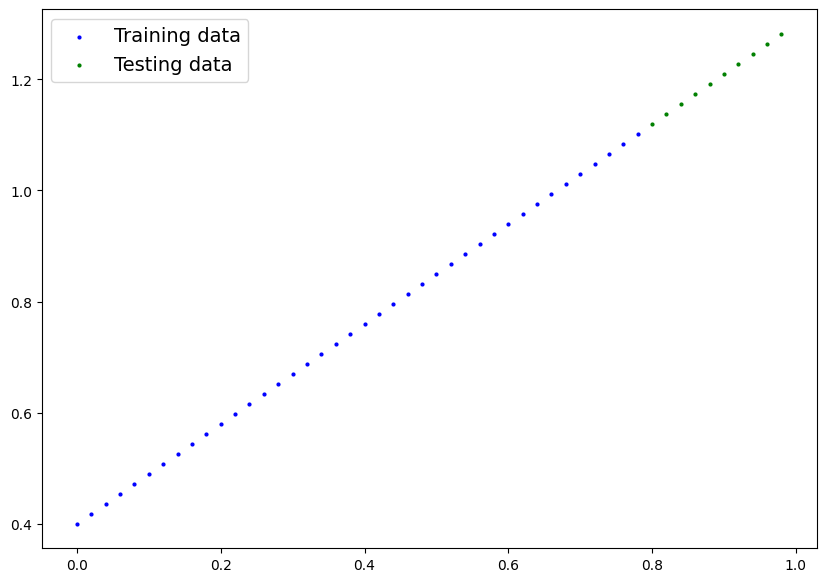

In [36]:
plot_predictions(X_train,y_train,X_test,y_test)

In [37]:
# Building a pytorch linear model using a subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # use nn.Linear for creating the model parameters
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  def forward(self, x:torch.Tensor) ->torch.Tensor:
    return self.linear_layer(x)


# Set the manual seed

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [38]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [39]:
# Set the model to use the target device (GPU)
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 3. Training

For training we need :
* loss function
* optimizer
* Training loop
* Testing loop

In [40]:
# Setup loss function
loss_fn = nn.L1Loss() # MAE

# Setup oour optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.01)


In [41]:
# Lets write training loop
torch.manual_seed(42)

epochs = 200

# Put data in the traget device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# 0. iterate through my data
for epoch in range(epochs):
  model_1.train() # open train mode

  # 1. Forward Pass
  y_pred = model_1(X_train)

  # 2. Calculate Loss
  loss = loss_fn(y_pred,y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backward pass
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

    # Print out whats happening
    if epoch%10 ==0:
      print(f"Epoch:{epoch}, Loss:{loss}, Test loss: {test_loss}")

Epoch:0, Loss:0.3771779537200928, Test loss: 0.2959762513637543
Epoch:10, Loss:0.26196810603141785, Test loss: 0.16126640141010284
Epoch:20, Loss:0.14675819873809814, Test loss: 0.02655658684670925
Epoch:30, Loss:0.06056583672761917, Test loss: 0.07872585207223892
Epoch:40, Loss:0.04930983856320381, Test loss: 0.10161154717206955
Epoch:50, Loss:0.045264553278684616, Test loss: 0.10164409875869751
Epoch:60, Loss:0.04174921661615372, Test loss: 0.09680598229169846
Epoch:70, Loss:0.03831041604280472, Test loss: 0.0885334238409996
Epoch:80, Loss:0.03487956151366234, Test loss: 0.08094775676727295
Epoch:90, Loss:0.03144560009241104, Test loss: 0.07267522066831589
Epoch:100, Loss:0.028006792068481445, Test loss: 0.06440269201993942
Epoch:110, Loss:0.024577636271715164, Test loss: 0.056817032396793365
Epoch:120, Loss:0.021141981706023216, Test loss: 0.048544492572546005
Epoch:130, Loss:0.01770414039492607, Test loss: 0.04095882177352905
Epoch:140, Loss:0.014275695197284222, Test loss: 0.03268

In [42]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4095], device='cuda:0'))])

In [43]:
weight, bias

(0.9, 0.4)

## 6.4 Making and evaluation mode

In [44]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.1284],
        [1.1464],
        [1.1644],
        [1.1824],
        [1.2003],
        [1.2183],
        [1.2363],
        [1.2543],
        [1.2722],
        [1.2902]], device='cuda:0')

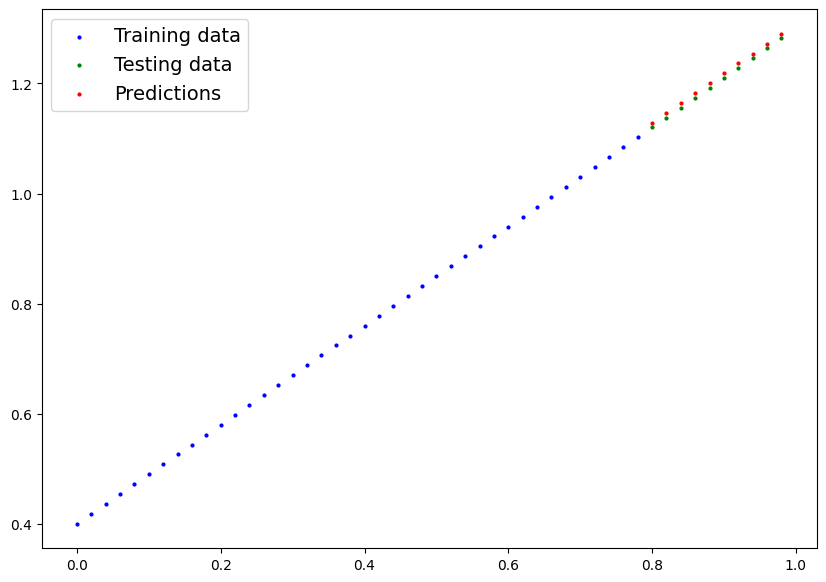

In [45]:
# Check out our model prediction visually
plot_predictions(predictions = y_preds.cpu())

## 6.5 Saving and Load trained model

In [46]:
# Save a Model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH /MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_1.pth


In [47]:
# Load a Pytorch

# Create a new instance
loaded_model_1 = LinearRegressionModelV2()

# oad the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

<ipython-input-47-32851feed1a4>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [48]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [49]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4095], device='cuda:0'))])

In [50]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')